In [1]:
import numpy as np
import subprocess

from base import *

print (prefixes)
print (inputFiles)
print (outputFiles)
print (commandFiles)
print (icFiles)
print (diffFiles)
print (diffOutputFiles)
print (matchingForwardFiles)
print (matchingAdjointFiles)
print (icAdjointFiles)
print (icGradientFiles)
print (innerProductFiles)
print (directories)

print (globalGradFiles)

['AcousticMonopole-0', 'AcousticMonopole-1', 'AcousticMonopole-2']
['magudi-0.inp', 'magudi-1.inp', 'magudi-2.inp']
['AcousticMonopole-0.forward_run.txt', 'AcousticMonopole-1.forward_run.txt', 'AcousticMonopole-2.forward_run.txt']
['AcousticMonopole-0.command.sh', 'AcousticMonopole-1.command.sh', 'AcousticMonopole-2.command.sh']
['AcousticMonopole-0.ic.q', 'AcousticMonopole-1.ic.q', 'AcousticMonopole-2.ic.q']
['AcousticMonopole-0.diff.q', 'AcousticMonopole-1.diff.q', '']
['AcousticMonopole-0.diff.txt', 'AcousticMonopole-1.diff.txt', '']
['AcousticMonopole-0-00000016.q', 'AcousticMonopole-1-00000020.q', '']
['AcousticMonopole-0-00000016.adjoint.q', 'AcousticMonopole-1-00000020.adjoint.q', '']
['', 'AcousticMonopole-1-00000016.adjoint.q', 'AcousticMonopole-2-00000020.adjoint.q']
['', 'AcousticMonopole-1.ic.adjoint.q', 'AcousticMonopole-2.ic.adjoint.q']
['AcousticMonopole.inner_product_controlRegion.txt', 'AcousticMonopole-1.inner_product.txt', 'AcousticMonopole-2.inner_product.txt']
['0'

In [2]:
baseline_ic = []
for k in range(Nsplit):
    baseline_ic += ['%s.ic.%1d.baseline.q'%(globalPrefix,k)]
print (baseline_ic)

for k in range(Nsplit):
    subprocess.check_call('cp %s %s'%(baseline_ic[k],icFiles[k]),shell=True)
command = forwardRunCommand()
print (command)
subprocess.check_call(command, shell=True)

['AcousticMonopole.ic.0.baseline.q', 'AcousticMonopole.ic.1.baseline.q', 'AcousticMonopole.ic.2.baseline.q']
./slice_control_forcing ./0/AcousticMonopole-0.control_forcing_controlRegion.dat ./AcousticMonopole.control_forcing_controlRegion.dat 14 0 6
./slice_control_forcing ./1/AcousticMonopole-1.control_forcing_controlRegion.dat ./AcousticMonopole.control_forcing_controlRegion.dat 14 4 6
./slice_control_forcing ./2/AcousticMonopole-2.control_forcing_controlRegion.dat ./AcousticMonopole.control_forcing_controlRegion.dat 14 8 6
cp ./AcousticMonopole-0.ic.q ./0/AcousticMonopole-0.ic.q
cp ./AcousticMonopole-1.ic.q ./1/AcousticMonopole-1.ic.q
cp ./AcousticMonopole-2.ic.q ./2/AcousticMonopole-2.ic.q
cd ./0 
./forward --input magudi-0.inp 
cd .. 
cd ./1 
./forward --input magudi-1.inp 
cd .. 
cd ./2 
./forward --input magudi-2.inp 
cd .. 
./qfile_zaxpy ./AcousticMonopole-0.diff.q -1.0000000000000000E+00 ./1/AcousticMonopole-1.ic.q ./0/AcousticMonopole-0-00000016.q --input ./0/magudi-0.inp 
./

0

In [3]:
QoI0, subJ = QoI('.')
print (QoI0)
print (subJ)

5.8981888336852293e-08
[1.07935345e-08 1.18830620e-08 1.13426404e-08 1.29499030e-01
 1.20127484e-01]


In [4]:
command = adjointRunCommand()
print(command)
subprocess.check_call(command, shell=True)

cd ./0 
function setOption() {
    if grep -q "$1" magudi-0.inp
    then
    sed -i.bu "s/^.*$1.*$/$1 = $2/g" magudi-0.inp
    else
    echo "$1 = $2" >> magudi-0.inp
    fi
}
setOption "enable_adjoint_restart" "true"
setOption "number_of_timesteps" 2 
setOption "adjoint_restart\/accumulated_timesteps" 0 
setOption "adjoint_restart\/intermediate_end_timestep" 4 
./adjoint --input magudi-0.inp 
cd .. 

cd ./1 
function setOption() {
    if grep -q "$1" magudi-1.inp
    then
    sed -i.bu "s/^.*$1.*$/$1 = $2/g" magudi-1.inp
    else
    echo "$1 = $2" >> magudi-1.inp
    fi
}
setOption "enable_adjoint_restart" "true"
setOption "number_of_timesteps" 2 
setOption "adjoint_restart\/accumulated_timesteps" 0 
setOption "adjoint_restart\/intermediate_end_timestep" 4 
./adjoint --input magudi-1.inp 
cd .. 

cd ./2 
function setOption() {
    if grep -q "$1" magudi-2.inp
    then
    sed -i.bu "s/^.*$1.*$/$1 = $2/g" magudi-2.inp
    else
    echo "$1 = $2" >> magudi-2.inp
    fi
}
setOption "ena

0

In [5]:
for k in range(NcontrolRegion):
    from os import path
    if (path.exists(globalGradFiles[k])):
        subprocess.check_call('rm '+globalGradFiles[k], shell=True)

command = gatherControlForcingGradientCommand()
print (command)
    
subprocess.check_call(command, shell=True)

./paste_control_forcing AcousticMonopole.gradient_controlRegion.dat 0/AcousticMonopole-0.gradient_controlRegion.dat 14 0 6
./paste_control_forcing AcousticMonopole.gradient_controlRegion.dat 1/AcousticMonopole-1.gradient_controlRegion.dat 14 4 6
./paste_control_forcing AcousticMonopole.gradient_controlRegion.dat 2/AcousticMonopole-2.gradient_controlRegion.dat 14 8 6



0

In [6]:
command = innerProductCommand(globalGradFiles,globalGradFiles,ggFiles)
print (command)

subprocess.check_call(command, shell=True)

./zxdoty AcousticMonopole.gg_controlRegion.txt AcousticMonopole.gradient_controlRegion.dat AcousticMonopole.gradient_controlRegion.dat AcousticMonopole.norm_controlRegion.dat 
./spatial_inner_product AcousticMonopole-1.ic.adjoint.q AcousticMonopole-1.ic.adjoint.q --input 1/magudi-1.inp --output AcousticMonopole-1.gg.txt 
./spatial_inner_product AcousticMonopole-2.ic.adjoint.q AcousticMonopole-2.ic.adjoint.q --input 2/magudi-2.inp --output AcousticMonopole-2.gg.txt 



0

In [7]:
Grad, subGrad = readInnerProduct(ggFiles)
print (Grad)
print (subGrad)
print ('{:.16E}'.format(subGrad[0]))

3.592012300844945e-14
[1.28680324e-23 2.34591470e-14 1.24609760e-14]
1.2868032354489759E-23


In [8]:
Nk = 20
Ak = 10.0**(12.0-0.25*np.array(range(Nk)))
QoIk = np.zeros((Nk,),dtype=np.double)
Gradk = np.zeros((Nk,),dtype=np.double)
ek = np.zeros((Nk,),dtype=np.double)

In [9]:
stepFiles = globalControlSpaceFiles.copy()
for k, file in enumerate(stepFiles):
    stepFiles[k] = 'step/' + file
print (stepFiles)
print (globalControlSpaceFiles)

['step/AcousticMonopole.control_forcing_controlRegion.dat', 'step/AcousticMonopole-1.ic.q', 'step/AcousticMonopole-2.ic.q']
['AcousticMonopole.control_forcing_controlRegion.dat', 'AcousticMonopole-1.ic.q', 'AcousticMonopole-2.ic.q']


In [10]:
baseFiles = globalControlSpaceFiles.copy()
for k in range(NcontrolRegion):
    baseFiles[k] = ''

stepFiles = globalControlSpaceFiles.copy()
for k, file in enumerate(stepFiles):
    stepFiles[k] = 'step/' + file
    
from os import path
if (path.exists(stepFiles[0])):
    subprocess.check_call('rm '+stepFiles[0], shell=True)

w2=initialConditionControllability
Grad = subGrad[0] + np.sum(subGrad[1:]) * w2
print ('Grad: ', Grad)
    
for k in range(Nk):
#     command = zaxpyCommand(stepFiles,Ak[k],globalGradFiles,baseFiles)
    command = zaxpyCommand(stepFiles,Ak[k],globalGradFiles,globalControlSpaceFiles)
    subprocess.check_call(command, shell=True)
    command = distributeCommand('step')
    subprocess.check_call(command, shell=True)
    command = forwardRunCommand('step')
    subprocess.check_call(command, shell=True)
    QoIk[k], subJ = QoI('step')
    Gradk[k] = (QoIk[k]-QoI0)/Ak[k]
    ek[k] = abs( (Gradk[k]-Grad)/Grad )
    print ("{:.16E}".format(Ak[k]), "{:.16E}".format(QoIk[k]), "{:.16E}".format(Gradk[k]), "{:.16E}".format(ek[k]))

Grad:  4.878815535007118e-23
1.0000000000000000E+12 5.9030689243644949E-08 4.8800906792655356E-23 2.6136349063990210E-04
5.6234132519034912E+11 5.9009327965145701E-08 4.8795326013287387E-23 1.4697549363683918E-04
3.1622776601683795E+11 5.8997317781370994E-08 4.8792187710292862E-23 8.2650393169184062E-05
1.7782794100389227E+11 5.8990564637299611E-08 4.8790422912941033E-23 4.6477733244547107E-05
1.0000000000000000E+11 5.8986767279901706E-08 4.8789430494124132E-23 2.6136344852626695E-05
5.6234132519034904E+10 5.8984631936769186E-08 4.8788872415945888E-23 1.4697540203420130E-05
3.1622776601683792E+10 5.8983431166541277E-08 4.8788558589166292E-23 8.2651023023786279E-06
1.7782794100389229E+10 5.8982755930605801E-08 4.8788382107446874E-23 4.6477956394770885E-06
1.0000000000000000E+10 5.8982376219680873E-08 4.8788282857918925E-23 2.6135000766288164E-06
5.6234132519034910E+09 5.8982162693214818E-08 4.8788227049134656E-23 1.4695998027109040E-06
3.1622776601683793E+09 5.8982042618673512E-08 4.878

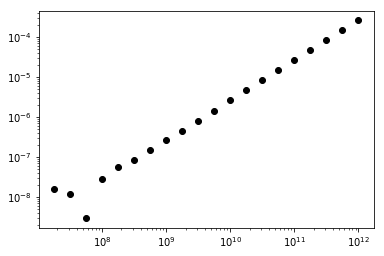

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.loglog(Ak,ek,'ok')